# [FBA] Asset Pricing Homework3

In [22]:
import math
import matplotlib.pyplot as plt
import numpy as np


## Summarize

### 1. Investment Science_ Mean-Variance portfolio Theory
#### 6.1 Asset return

$$ r = {\frac{X_1 - X_0}{X_0}} $$

$r$ = rate of return 

$X_0$ = the amounts of money invested, $X_1$ = the amounts of money received

#### 6.2 Random Variables

- Expected Value (linearity)
- Variance : diversification to reduce portfolio variance essentially to zero by taking $n$ large
- Covarianxe(correlation)

#### 6.3 Mean-Standard deviation Diagram

When two assets are combined in various combinations,the resulting portfolios sweep out a curve between the points representing the original assets. its exact shape depends on the covariance of these assets returns.$\sigma_{12}$

The edges are defined by the extreme values of the correlation coefficient $\rho$

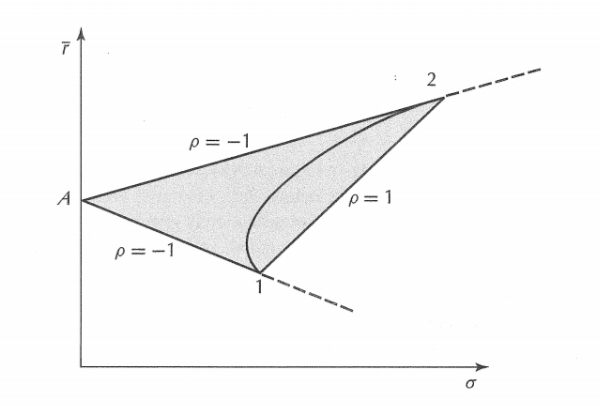

- the point on the vertical axis of height $ A = (\bar r_1\rho_2 + \bar r_2\rho_1) / (\sigma_1+\sigma_2) $

#### 6.4 The Markowitz Model

##### problem
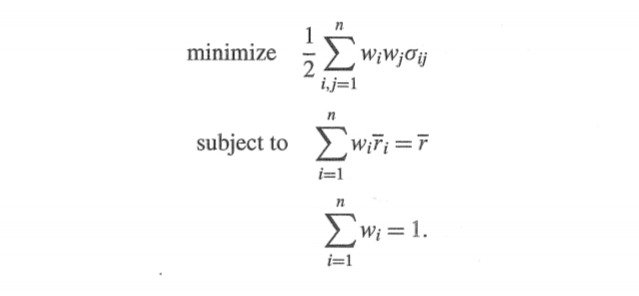

##### solution 
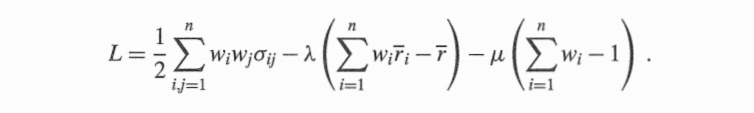

We differentiate the Lagrangian with respect to each variable $w_i$ and set this derivative to zero

### 2. An introduction to Portfolio Optimization

### 3. Beyond Diversification

#### CPPI

The CPPI procedure dynamically allocates total assets to a risky asset and a safe asset

- Downsid protection : gap risk materializes if and only if the loss on the risky portfolio relative to the safe portfolio exceeds 1/M within the trading interval

$$
F_t \leq A_t \leq T_t => E_t = m(A_t - F_t)
$$
$$
T_t \leq A_t \leq C_t => E_t = m(C_t - A_t)
$$

the Threshold Value = 
    $$(F_t+C_t)/2$$

## problem1)

### Efficient Frontier

In [4]:
import pandas as pd
ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100

In [5]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
192608,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
192609,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
192610,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
192611,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [6]:
ind.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [8]:
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')

In [9]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [10]:
ind.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

In [11]:
ind["Food "].shape

(1110,)

In [12]:
ind.columns = ind.columns.str.strip()

In [13]:
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [15]:
ind.shape

(1110, 30)

In [16]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [23]:
import edhec_risk_kit as erk

<AxesSubplot:>

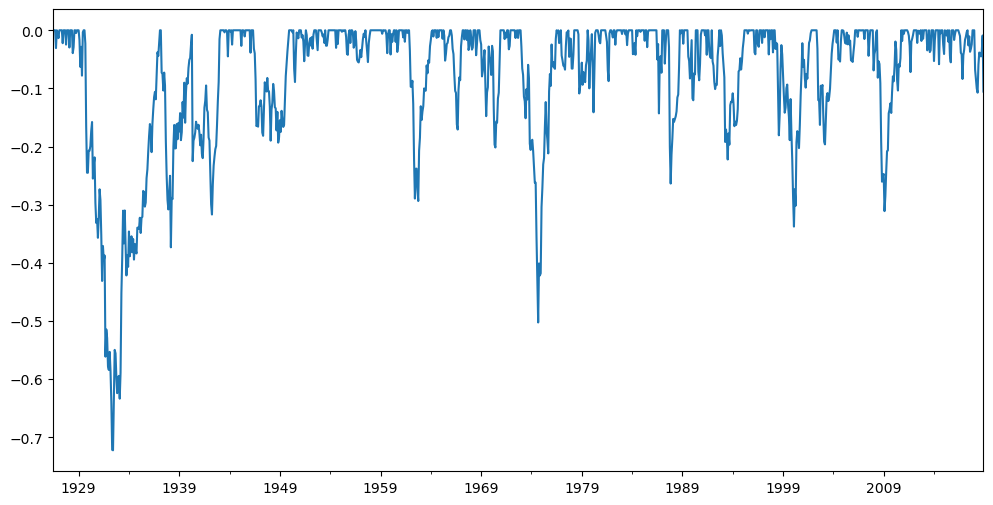

In [24]:
erk.drawdown(ind["Food"])["Drawdown"].plot(figsize=(12, 6))

<AxesSubplot:title={'center':'Industry Gaussian VaR 1926-2018'}>

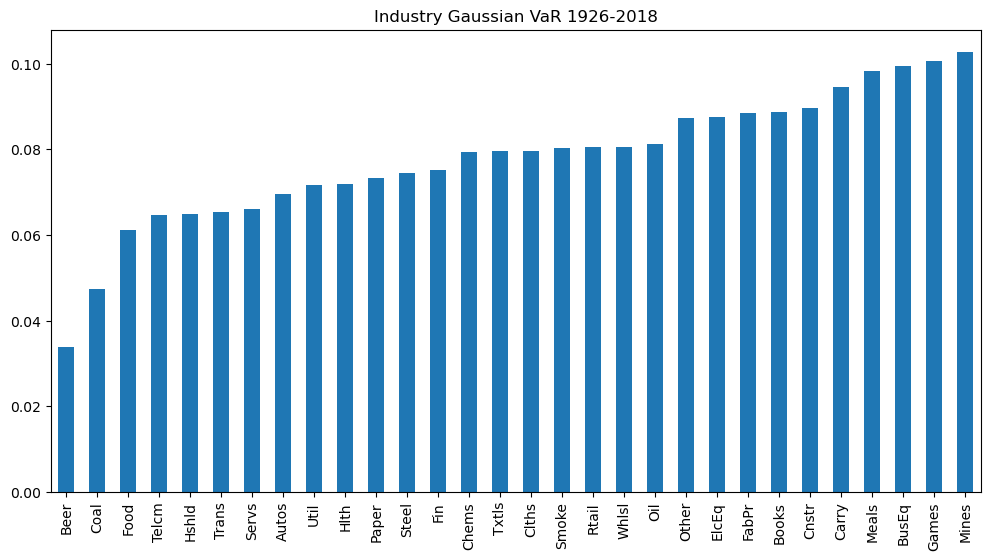

In [25]:
erk.var_gaussian(ind, modified=True).sort_values().plot.bar(title="Industry Gaussian VaR 1926-2018", figsize=(12,6))

<AxesSubplot:title={'center':'Industry Sharpe Ratio 2000-2018'}>

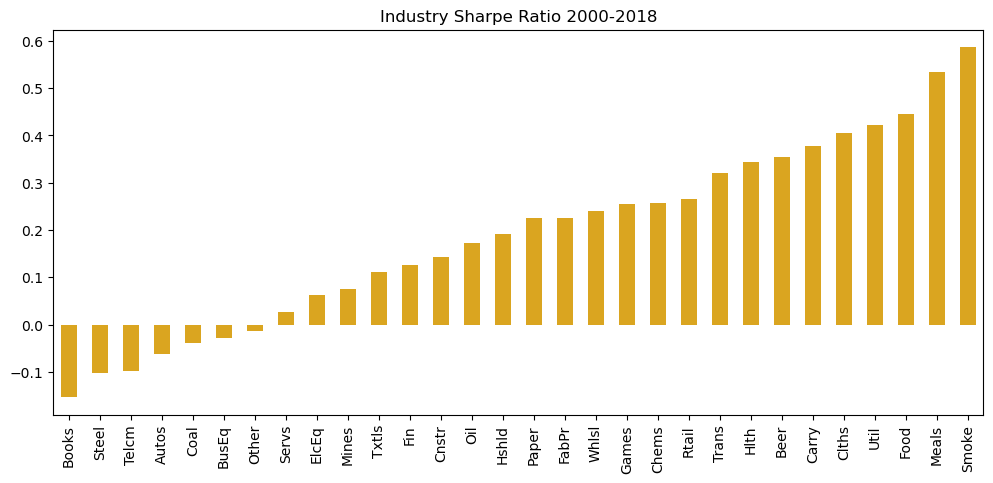

In [31]:
erk.sharpe_ratio(ind["2000":], 12).sort_values().plot.bar(title="Industry Sharpe Ratio 2000-2018", figsize=(12,5), color="goldenrod")

In [32]:
er = erk.annualized_return(ind["1995":"2000"], 12)

<AxesSubplot:>

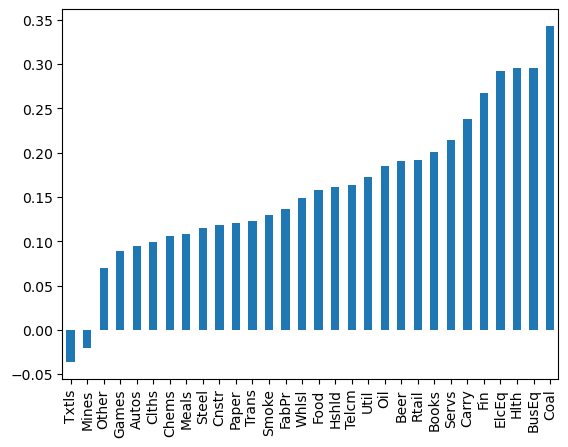

In [33]:
er.sort_values().plot.bar()

In [36]:
cov = ind["1995":"2000"].cov()
cov

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002287,0.002077,0.001757,0.000701,0.000886,0.001208,0.001474,0.001105,0.001253,0.001021,...,0.000610,0.000211,-0.000280,0.001205,0.001312,0.000633,0.001165,0.001085,0.001839,0.000898
Beer,0.002077,0.004599,0.001143,0.001147,0.000765,0.002447,0.001415,0.001689,0.001292,0.001721,...,0.000978,0.000400,0.000028,0.001455,0.001974,0.000609,0.001442,0.001634,0.002236,0.001196
Smoke,0.001757,0.001143,0.007130,0.000296,-0.000099,0.000981,0.000761,0.000877,0.000687,0.000555,...,0.000057,-0.000266,-0.000300,0.001061,0.000241,0.001363,0.000069,0.000590,0.001117,0.001418
Games,0.000701,0.001147,0.000296,0.003271,0.001485,0.001018,0.001814,0.001219,0.001547,0.001291,...,0.001615,0.002399,0.002935,0.001615,0.001438,0.001681,0.001649,0.001383,0.002080,0.002088
Books,0.000886,0.000765,-0.000099,0.001485,0.002302,0.000876,0.002037,0.000657,0.001559,0.001362,...,0.001627,0.001996,0.001624,0.001481,0.001576,0.001205,0.001995,0.001026,0.001979,0.001283
Hshld,0.001208,0.002447,0.000981,0.001018,0.000876,0.002849,0.001046,0.001253,0.001226,0.001172,...,0.000889,0.001111,0.000906,0.001594,0.001366,0.000578,0.001157,0.001076,0.001652,0.001322
Clths,0.001474,0.001415,0.000761,0.001814,0.002037,0.001046,0.004896,0.000759,0.002547,0.002105,...,0.001263,0.001401,0.000746,0.002683,0.002466,0.001654,0.002607,0.002229,0.002699,0.001974
Hlth,0.001105,0.001689,0.000877,0.001219,0.000657,0.001253,0.000759,0.002252,0.000444,0.000538,...,0.001093,0.001390,0.001264,0.000552,0.000880,0.000907,0.000770,0.000900,0.001412,0.001099
Chems,0.001253,0.001292,0.000687,0.001547,0.001559,0.001226,0.002547,0.000444,0.002944,0.001705,...,0.000860,0.001072,0.000935,0.002581,0.001966,0.001257,0.001661,0.001425,0.002143,0.001832
Txtls,0.001021,0.001721,0.000555,0.001291,0.001362,0.001172,0.002105,0.000538,0.001705,0.002882,...,0.000790,0.000582,0.000685,0.001869,0.001760,0.001426,0.001696,0.001126,0.001789,0.001668


### Efficient Frontier Part 2

In [38]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from scipy.optimize import minimize
import edhec_risk_kit as erk

ind = erk.get_ind_returns()
er = erk.annualized_return(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
l = ["Food", "Beer", "Smoke", "Coal"]
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [58]:
cov.loc[l, l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [60]:
weights = np.repeat(1/4, 4)
weights

array([0.25, 0.25, 0.25, 0.25])

In [61]:
erk.portfolio_return(weights, er[l])

0.19511097196038385

In [64]:
erk.portfolio_vol(weights, cov.loc[l, l])

0.055059195776437045

#### Asset Frontier

In [65]:
l = ["Games", "Fin"]

In [66]:
n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [67]:
len(weights)

20

<AxesSubplot:xlabel='Vol', ylabel='R'>

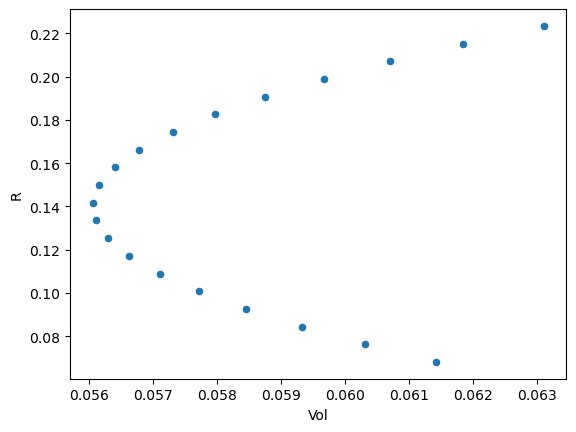

In [70]:
rets = [erk.portfolio_return(w, er[l]) for w in weights]
vols = [erk.portfolio_vol(w, cov.loc[l, l]) for w in weights]
import pandas as pd
ef = pd.DataFrame({"R": rets, "Vol": vols})
ef.plot.scatter(x="Vol", y="R")

<AxesSubplot:xlabel='Volatility'>

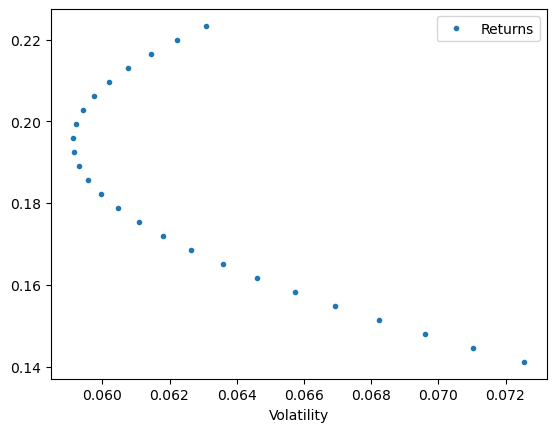

In [72]:
l = ["Fin", "Beer"]
erk.plot_ef2(25, er[l], cov.loc[l, l], style=".")

#### N-Asset Efficient Frontier

In [79]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from scipy.optimize import minimize
import edhec_risk_kit as erk

ind = erk.get_ind_returns()
er = erk.annualized_return(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
from scipy.optimize import minimize 

<AxesSubplot:xlabel='Volatility'>

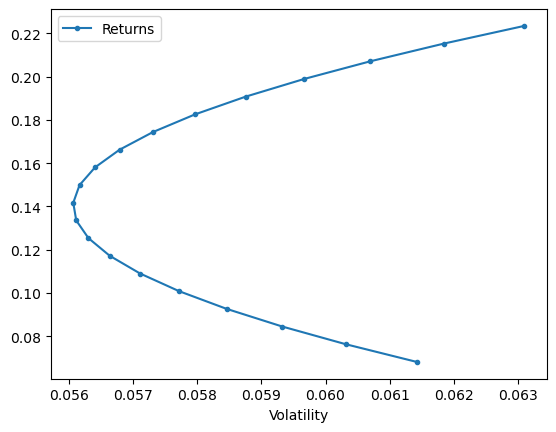

In [81]:
l = ["Games", "Fin"]
erk.plot_ef2(20, er[l], cov.loc[l, l])

In [88]:
w15 = erk.minimize_vol(0.15, er[l], cov.loc[l, l])
vol15 = erk.portfolio_vol(w15, cov.loc[l, l])
vol15

0.056163669406706564

In [89]:
w15

array([0.47287631, 0.52712369])

<AxesSubplot:title={'center':'Multi-asset Efficient Frontier'}, xlabel='Volatility'>

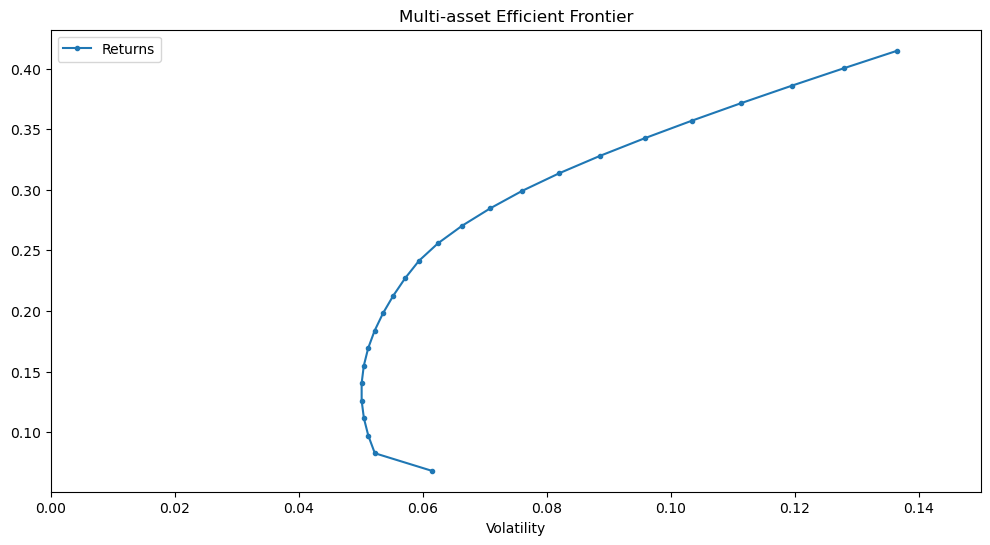

In [91]:
l = ["Smoke", "Fin", "Games", "Coal"]
erk.plot_ef(25, er[l], cov.loc[l, l])

#### Finding the Max Sharpe Ratio Portfolio

<AxesSubplot:title={'center':'Multi-asset Efficient Frontier'}, xlabel='Volatility'>

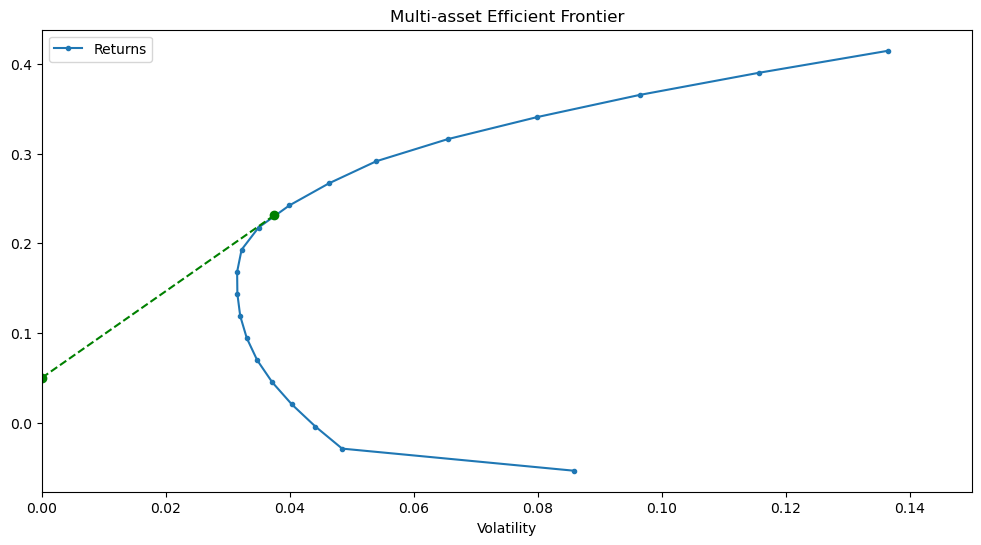

In [98]:
erk.plot_ef(20, er, cov, show_cml=True)

#### Lack of Robustness of the Markowitz Procedure, and the GMV

In [102]:
l = ["Food", "Steel"]
erk.msr(0.1, er[l], cov.loc[l, l])

array([0.75040363, 0.24959637])

In [103]:
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

In [104]:
erk.msr(0.1, np.array([.11, .12]), cov.loc[l, l])

array([0.57930354, 0.42069646])

In [106]:
erk.msr(0.1, np.array([.10, .13]), cov.loc[l, l])

array([0., 1.])

<AxesSubplot:title={'center':'Multi-asset Efficient Frontier'}, xlabel='Volatility'>

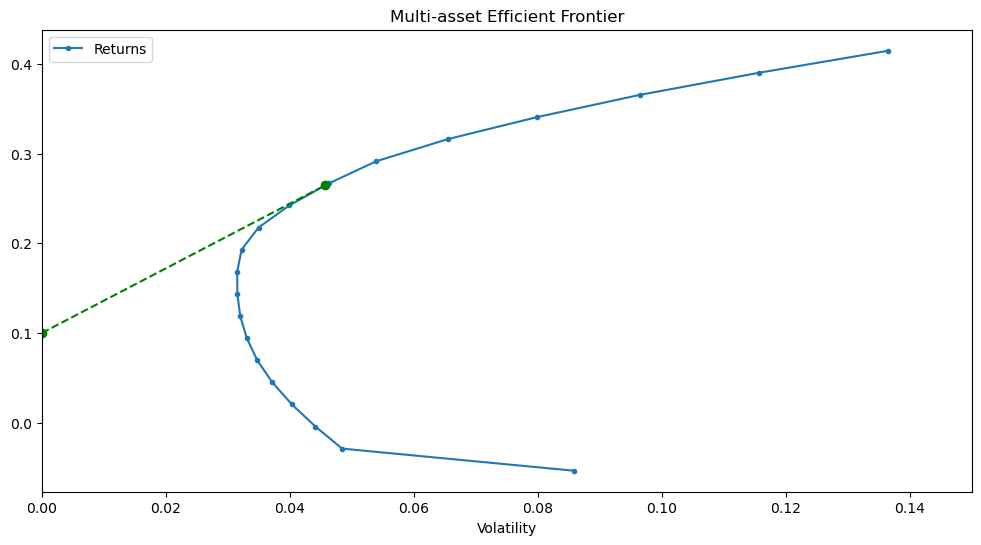

In [109]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree=0.1)

#### Limits of Diversificaion

In [154]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import edhec_risk_kit as erk

ind_return = erk.get_ind_returns()
ind_nfirms = erk.get_ind_nfirms()
ind_size = erk.get_ind_size()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [155]:
ind_return.shape

(1110, 30)

In [156]:
ind_nfirms.shape

(1110, 30)

In [157]:
ind_size.shape

(1110, 30)

In [158]:
ind_nfirms.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-08,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-09,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-10,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-11,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4


In [159]:
ind_mktcap = ind_nfirms * ind_size
ind_mktcap.shape

(1110, 30)

In [160]:
total_mktcap = ind_mktcap.sum(axis="columns")

<AxesSubplot:>

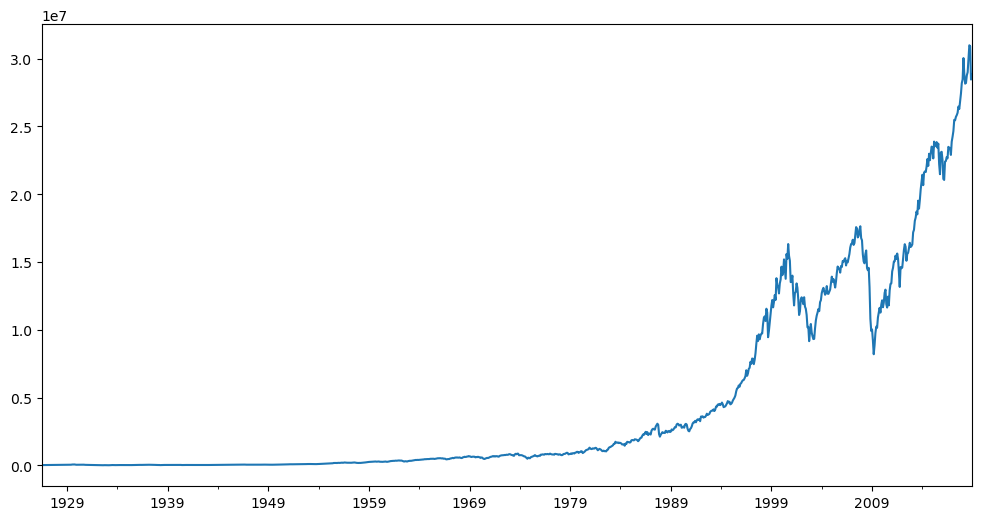

In [161]:
total_mktcap.plot(figsize=(12,6))

In [162]:
ind_capweight = ind_mktcap.divide(total_mktcap, axis="rows")

In [163]:
ind_capweight.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521


In [164]:
ind_capweight["1926"].sum(axis="columns")

C:\Users\user\AppData\Local\Temp\ipykernel_26444\1579460218.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ind_capweight["1926"].sum(axis="columns")


1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
1926-12    1.0
Freq: M, dtype: float64

<AxesSubplot:>

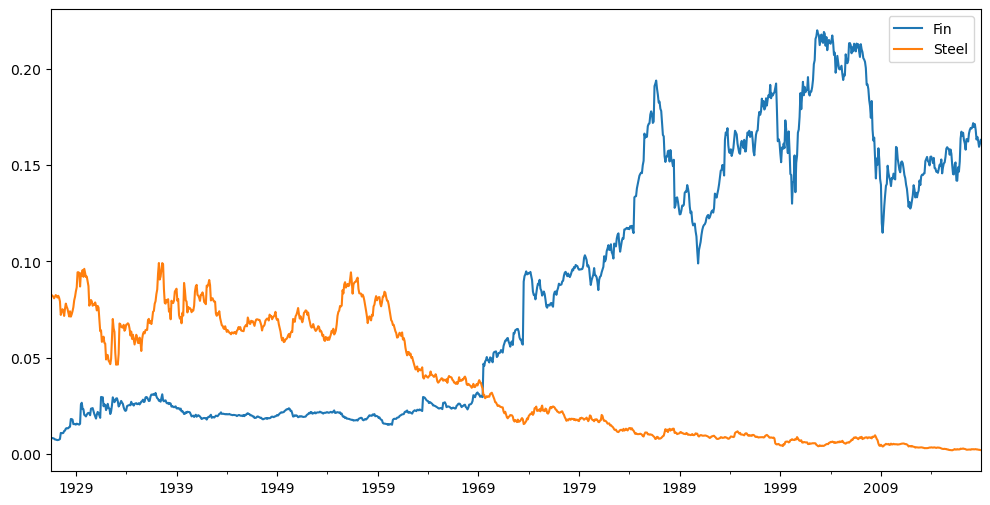

In [165]:
ind_capweight[["Fin", "Steel"]].plot(figsize=(12, 6))

In [166]:
total_market_return = (ind_capweight*ind_return).sum(axis="columns")

<AxesSubplot:>

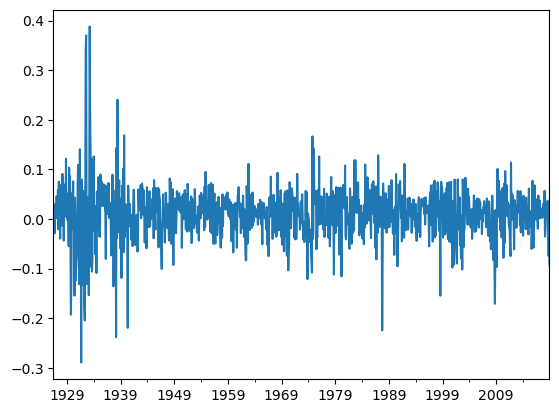

In [167]:
 total_market_return.plot()

<AxesSubplot:title={'center':'Total Market CapWeight Index 1926-2018'}>

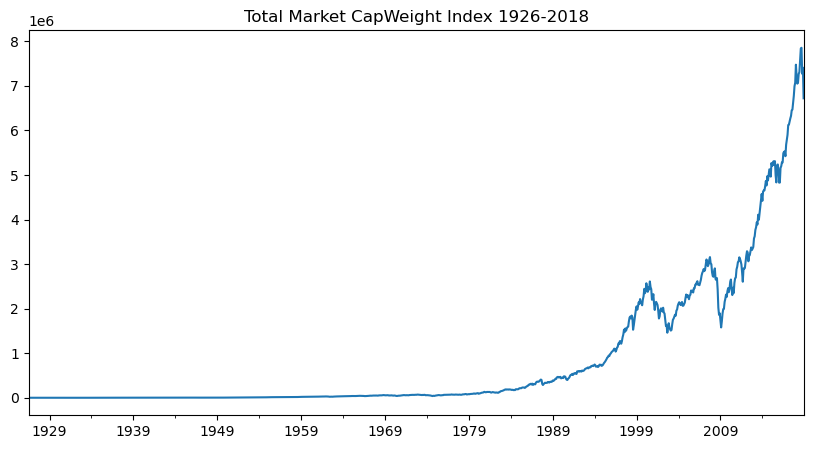

In [168]:
total_market_index = erk.drawdown(total_market_return).Wealth
total_market_index.plot(figsize=(10,5), title="Total Market CapWeight Index 1926-2018")

<AxesSubplot:>

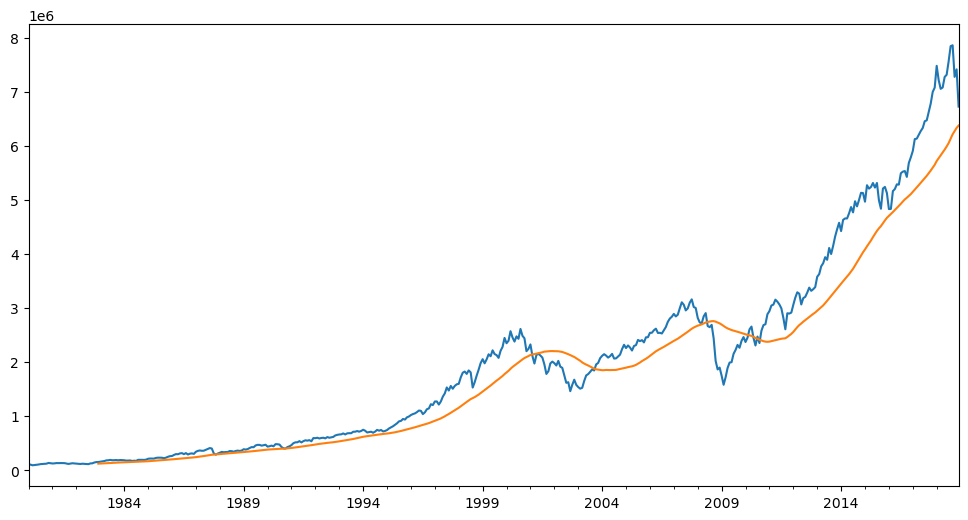

In [169]:
total_market_index["1980":].plot(figsize=(12,6))
total_market_index["1980":].rolling(window=36).mean().plot()

<AxesSubplot:>

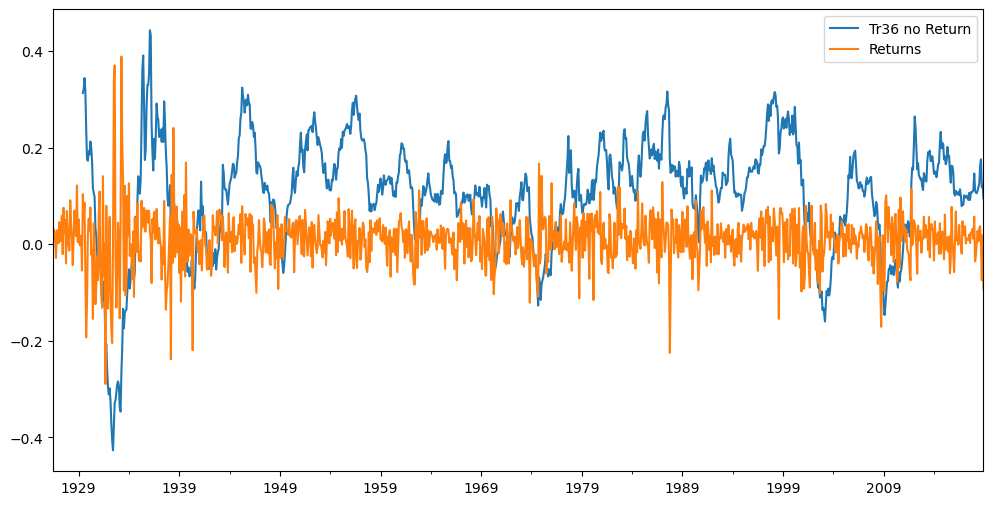

In [170]:
tmi_tr36rets = total_market_return.rolling(window=36).aggregate(erk.annualize_rets, periods_per_year=12)
tmi_tr36rets.plot(figsize=(12,6), label="Tr36 no Return", legend=True)
total_market_return.plot(label="Returns", legend=True)

#### Rolling Correlation - along with MultiIndexes and .groupby

In [176]:
ts_corr = ind_return.rolling(window=36).corr()
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [177]:
ind_return.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [179]:
ts_corr.index.names = ['date', 'industry']
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
date    industry                                                               
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
date    industry                                          ...             
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
date    industry                                                               
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
date    industry                                
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

<AxesSubplot:xlabel='date'>

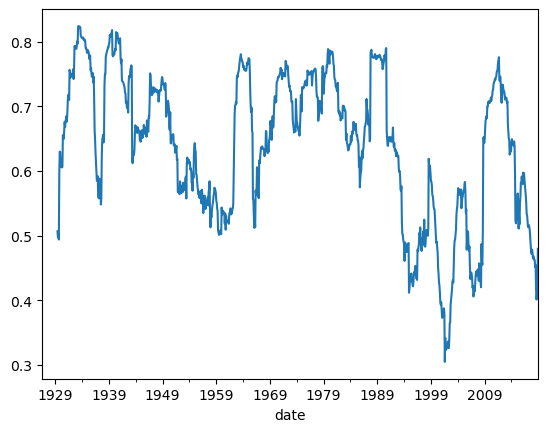

In [181]:
ind_tr36corr = ts_corr.groupby(level='date').apply(lambda cormat: cormat.values.mean())
ind_tr36corr.plot()

<AxesSubplot:>

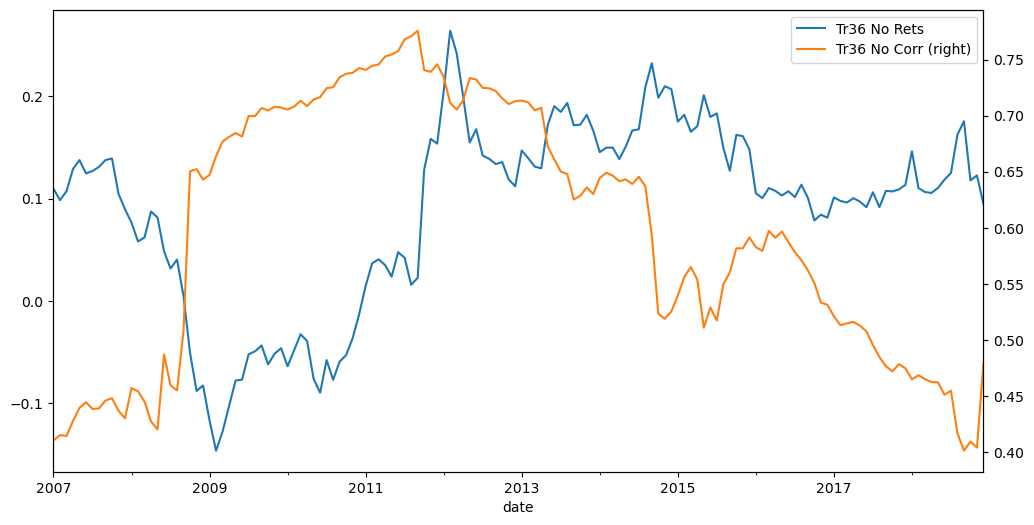

In [185]:
tmi_tr36rets["2007":].plot(label="Tr36 No Rets", figsize=(12,6), legend=True)
ind_tr36corr["2007":].plot(label="Tr36 No Corr", legend=True, secondary_y=True)

In [186]:
tmi_tr36rets.corr(ind_tr36corr)

-0.28010065062884026

#### Implementing Porfolio Insurance (CPPI) and Drawdown Constraints

In [191]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import edhec_risk_kit as erk

ind_return = erk.get_ind_returns()
tmi_return = erk.get_total_market_index_returns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [192]:
risky_r = ind_return["2000":][["Steel", "Fin", "Beer"]]
risky_r.shape

(228, 3)

In [194]:
safe_r = pd.DataFrame().reindex_like(risky_r)
safe_r.shape

(228, 3)

In [195]:
safe_r[:] = 0.03/12
start = 1000
floor = 0.8

1. Cushion - (Asset Value minus Floor Value)
2. Compute an Allocation to Safe and Risky Assets --> m*risk budget
3. Recompute the Asset Value based on the returns

In [246]:
def compound1(r):
    return (1+r).prod()-1

def compound2(r):
    return np.expm1( np.log1p(r).sum() )

In [247]:
compound1(risky_r)

Steel   -0.051696
Fin      1.773937
Beer     3.361349
dtype: float64

In [248]:
compound2(risky_r)

Steel   -0.051696
Fin      1.773937
Beer     3.361349
dtype: float64

In [249]:
%timeit compound1(risky_r)

1.49 ms ± 534 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [250]:
%timeit compound2(risky_r)

1.45 ms ± 198 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### Back to CPPI

In [263]:
dates = risky_r.index
n_steps = len(dates)
account_value = start
floor_value = start*floor
m = 3
account_history = pd.DataFrame().reindex_like(risky_r)
cushion_history = pd.DataFrame().reindex_like(risky_r)
risky_w_history = pd.DataFrame().reindex_like(risky_r)

for step in range(n_steps):
    cushion = (account_value - floor_value)/account_value
    risky_w = m*cushion
    risky_w = np.minimum(risky_w, 1)
    risky_w = np.maximum(risky_w, 0)
    safe_w = 1-risky_w
    risky_alloc = account_value*risky_w
    safe_alloc = account_value*safe_w
    ## update 
    account_value = risky_alloc*(1+risky_r.iloc[step]) + safe_alloc*(1+safe_r.iloc[step])
    #sace
    cushion_history.iloc[step] = cushion
    risky_w_history.iloc[step] = risky_w
    account_history.iloc[step] = account_value

In [264]:
account_history.head()

,Steel,Fin,Beer
2000-01,984.380000,974.480000,987.320000
2000-02,1023.292876,931.167544,922.971256
2000-03,1047.555176,998.187296,924.835988
2000-04,1042.079009,973.927479,939.993701
2000-05,1007.137753,1001.460033,991.145489


In [265]:
risky_wealth = start*(1+risky_r).cumprod()

<AxesSubplot:>

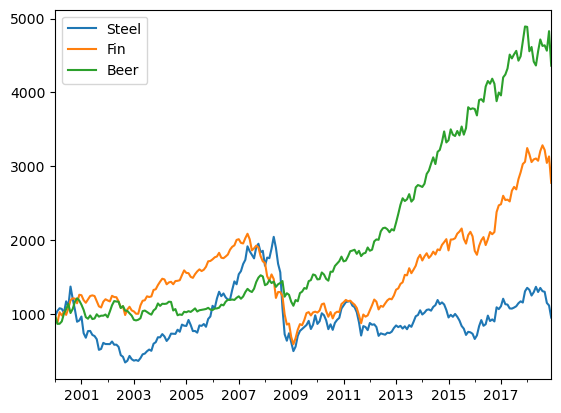

In [266]:
risky_wealth.plot()

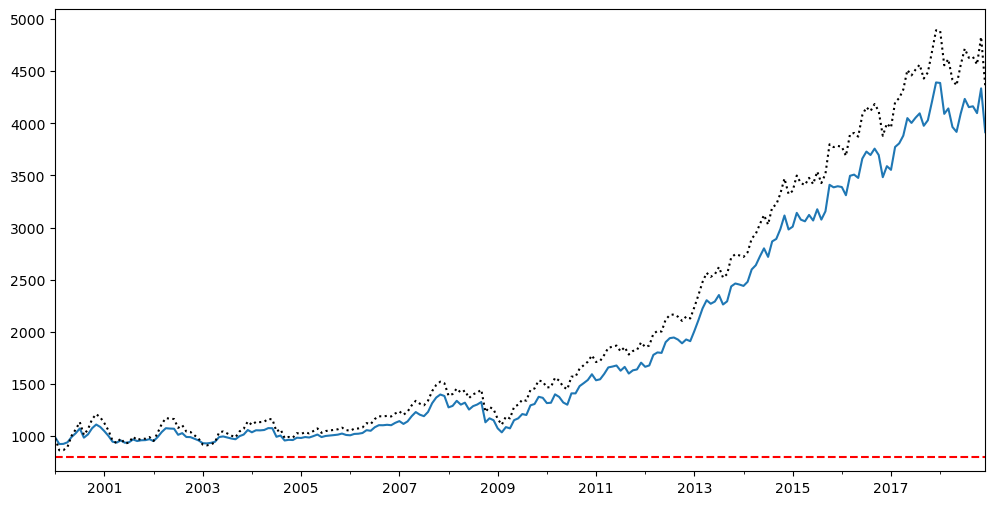

In [267]:
ax = account_history["Beer"].plot(figsize=(12,6))
risky_wealth["Beer"].plot(ax=ax, style="k:")
ax.axhline(y=floor_value, color='r', linestyle="--")

<AxesSubplot:>

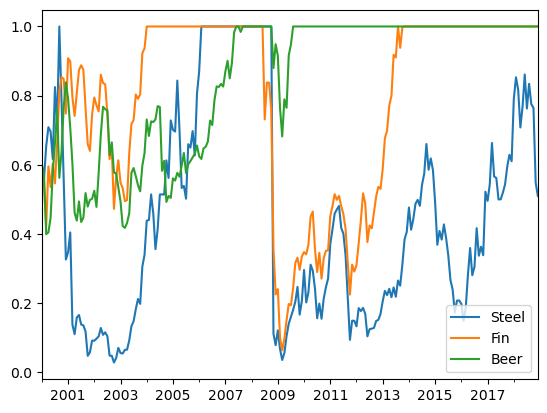

In [268]:
risky_w_history.plot()

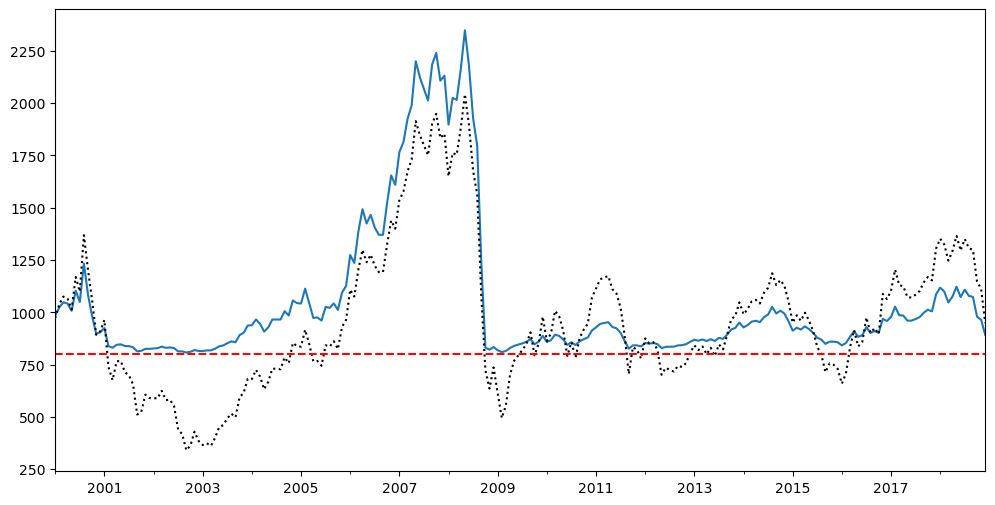

In [269]:
ax = account_history["Steel"].plot(figsize=(12,6))
risky_wealth["Steel"].plot(ax=ax, style="k:")
ax.axhline(y=floor_value, color='r', linestyle="--")

In [270]:
erk.summary_stats(risky_r)

,Ann. return,Ann. vol,Sharpe ratio,Skewness,Kurtosis,Historic CVar,C-F Var,Max Drawdown
Steel,-0.002790,0.312368,-0.102567,-0.326334,4.144381,0.208117,0.150139,-0.758017
Fin,0.055166,0.192909,0.126718,-0.533218,4.995534,0.132175,0.091224,-0.718465
Beer,0.080598,0.138925,0.354314,-0.493545,4.173881,0.091442,0.063015,-0.271368


In [277]:
btr = erk.run_cppi(risky_r)
erk.summary_stats(btr['CPPI wealth'].pct_change().dropna())

,Ann. return,Ann. vol,Sharpe ratio,Skewness,Kurtosis,Historic CVar,C-F Var,Max Drawdown
Steel,-0.005167,0.174180,-0.196750,-1.995143,17.110190,0.130153,0.091995,-0.655198
Fin,0.040894,0.131678,0.080352,-0.946504,6.051414,0.091621,0.065535,-0.549673
Beer,0.075544,0.115462,0.383772,-0.669250,4.760879,0.074908,0.052923,-0.259582


In [279]:
erk.summary_stats(btr['Risky wealth'].pct_change().dropna())

,Ann. return,Ann. vol,Sharpe ratio,Skewness,Kurtosis,Historic CVar,C-F Var,Max Drawdown
Steel,-0.001320,0.312973,-0.097801,-0.330333,4.132666,0.208117,0.150415,-0.758017
Fin,0.057941,0.192986,0.140661,-0.543630,5.015294,0.132175,0.091172,-0.718465
Beer,0.082286,0.139058,0.365788,-0.502368,4.181533,0.091442,0.063037,-0.271368
